## Importing Required Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import os

## TASK1: Data Loading and Processing

In [27]:
full_data = pd.read_csv('./DataSets/Part_1_Crime_Data.csv', low_memory=False)

start_year = '2017'
end_year = '2023'

filtered_data = full_data[(full_data['CrimeDateTime'] >= start_year) & (full_data['CrimeDateTime'] <= end_year)]

desired_values = ['HOMICIDE', 'SHOOTING', 'AGG. ASSAULT']

# Use the isin() method to select data based on the desired values
filtered_data = filtered_data[filtered_data['Description'].isin(desired_values)]

filtered_data['CrimeDateTime'] = pd.to_datetime(filtered_data['CrimeDateTime'])

filtered_data['Year'] = filtered_data['CrimeDateTime'].dt.year

filtered_data['Neighborhood'] = filtered_data['Neighborhood'].astype(str)

filtered_data.to_csv('./DataSets/crime_data_2017_to_2022.csv', index=False)  

filtered_data = pd.read_csv('./DataSets/crime_data_2017_to_2022.csv', low_memory=False)

filtered_data = filtered_data.dropna(subset=['Neighborhood'])

filtered_data['Neighborhood'] = filtered_data['Neighborhood'].str.upper()

filtered_data.to_csv('./DataSets/Cleansed_Dataset.csv', index=False)  

In [28]:
# Group and aggregate the data by neighborhood and year
crime_summary = filtered_data.groupby(['Neighborhood', 'Year'])['Total_Incidents'].sum().reset_index()
crime_summary.to_csv('./DataSets/Task1/crime_summary_task1.csv', index = False)

## TASK 2: Overall change of crime in Baltimore City (2017-2022)

Overall Change Percentage: 4.88%


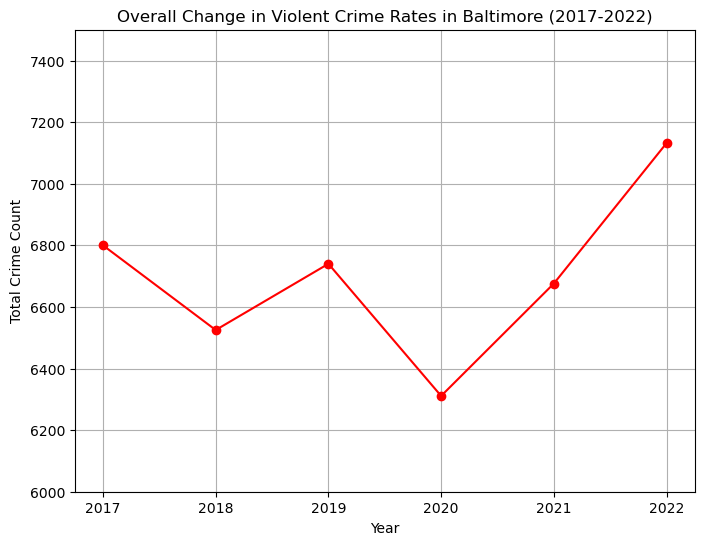

In [29]:

# Calculate overall change in crime for Baltimore City
total_incidents_by_year = filtered_data.groupby('Year').size().reset_index(name='Total_Incidents')
total_incidents_2017 = total_incidents_by_year['Total_Incidents'].iloc[0]
total_incidents_2022 = total_incidents_by_year['Total_Incidents'].iloc[-1]
overall_change_percentage = ((total_incidents_2022 - total_incidents_2017) / total_incidents_2017) * 100
print(f"Overall Change Percentage: {overall_change_percentage:.2f}%")

# Data Visualization
plt.figure(figsize=(8, 6))
plt.plot(total_incidents_by_year['Year'], total_incidents_by_year['Total_Incidents'], marker='o', color='red')
plt.ylim(6000, 7500)
plt.title('Overall Change in Violent Crime Rates in Baltimore (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.grid(True)
#plt.savefig('./Result_Pics/Overall_Change.png')
plt.show()


## TASK3 : Top_5 Neighborhoods Increase & Decrease Stats

In [30]:
crime_stats = crime_summary.groupby(['Neighborhood','Year'])['Total_Incidents'].sum().unstack()
crime_stats['Total_Crime_Count'] = crime_stats.sum(axis=1)
crime_stats = crime_stats.sort_values(by='Total_Crime_Count', ascending=False)


top_increase_neighborhoods = crime_stats.nlargest(5, 'Total_Crime_Count')
top_decrease_neighborhoods = crime_stats.nsmallest(5, 'Total_Crime_Count')


#print('Required Neighbourhoods')
#required_neighborhoods.head(11)
#crime_stats.head()

In [31]:
top_increase_neighborhoods_reset = top_increase_neighborhoods.reset_index()
top_decrease_neighborhoods_reset = top_decrease_neighborhoods.reset_index()
print('Top_5 Greatest Increase Neighbourhoods In Crime')
top_increase_neighborhoods_reset.head()


Top_5 Greatest Increase Neighbourhoods In Crime


Year,Neighborhood,2017,2018,2019,2020,2021,2022,Total_Crime_Count
0,DOWNTOWN,158.0,207.0,211.0,188.0,202.0,222.0,1188.0
1,SANDTOWN-WINCHESTER,207.0,156.0,147.0,171.0,155.0,168.0,1004.0
2,BROOKLYN,226.0,137.0,163.0,139.0,128.0,178.0,971.0
3,FRANKFORD,121.0,147.0,166.0,169.0,148.0,218.0,969.0
4,BELAIR-EDISON,163.0,141.0,156.0,152.0,143.0,179.0,934.0


In [32]:
print('Top_5 Greatest Decrease Neighbourhoods In Crime')
top_decrease_neighborhoods_reset.head()

Top_5 Greatest Decrease Neighbourhoods In Crime


Year,Neighborhood,2017,2018,2019,2020,2021,2022,Total_Crime_Count
0,LAKE EVESHAM,NaN,NaN,NaN,1.0,NaN,NaN,1.0
1,LOYOLA/NOTRE DAME,1.0,NaN,NaN,NaN,NaN,NaN,1.0
2,PORT COVINGTON,NaN,NaN,NaN,NaN,1.0,NaN,1.0
3,VILLAGES OF HOMELAND,NaN,NaN,2.0,NaN,NaN,NaN,2.0
4,CEDARCROFT,1.0,NaN,NaN,1.0,NaN,NaN,2.0


In [33]:
required_neighborhoods = pd.concat([top_increase_neighborhoods_reset,top_decrease_neighborhoods_reset], ignore_index=True)
print('All the top5 and bottom5 neighborhoods')
required_neighborhoods.head(11)

All the top5 and bottom5 neighborhoods


Year,Neighborhood,2017,2018,2019,2020,2021,2022,Total_Crime_Count
0,DOWNTOWN,158.0,207.0,211.0,188.0,202.0,222.0,1188.0
1,SANDTOWN-WINCHESTER,207.0,156.0,147.0,171.0,155.0,168.0,1004.0
2,BROOKLYN,226.0,137.0,163.0,139.0,128.0,178.0,971.0
3,FRANKFORD,121.0,147.0,166.0,169.0,148.0,218.0,969.0
4,BELAIR-EDISON,163.0,141.0,156.0,152.0,143.0,179.0,934.0
5,LAKE EVESHAM,NaN,NaN,NaN,1.0,NaN,NaN,1.0
6,LOYOLA/NOTRE DAME,1.0,NaN,NaN,NaN,NaN,NaN,1.0
7,PORT COVINGTON,NaN,NaN,NaN,NaN,1.0,NaN,1.0
8,VILLAGES OF HOMELAND,NaN,NaN,2.0,NaN,NaN,NaN,2.0
9,CEDARCROFT,1.0,NaN,NaN,1.0,NaN,NaN,2.0


## Data Visualization

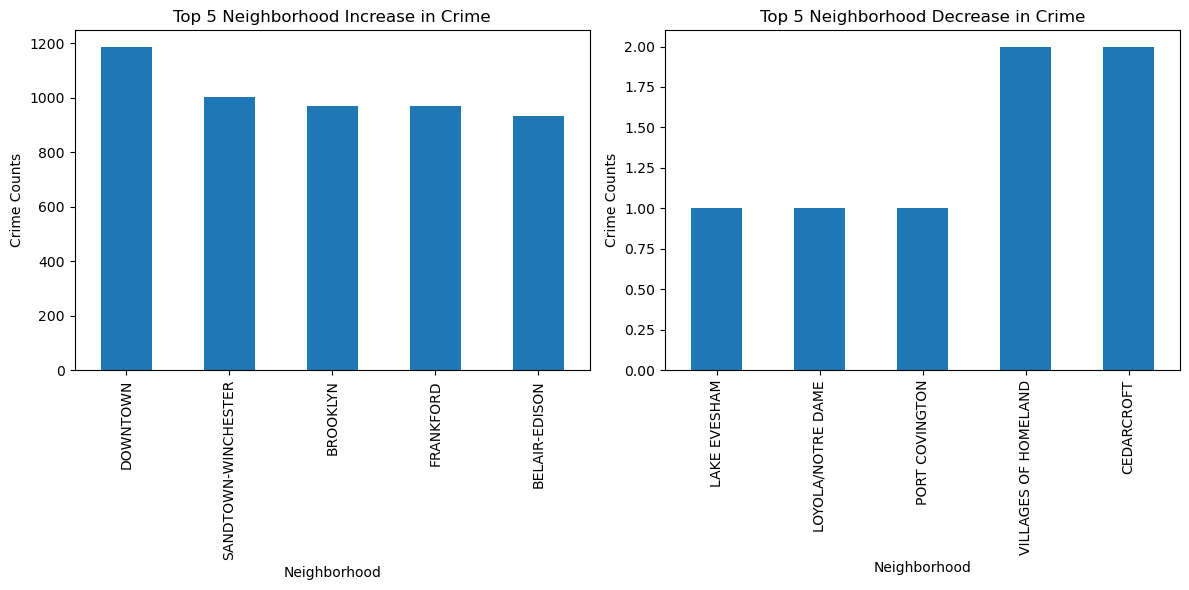

In [34]:
#data visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

top_increase_neighborhoods['Total_Crime_Count'].plot(kind='bar', ax=axes[0], title='Top 5 Neighborhood Increase in Crime')
top_decrease_neighborhoods['Total_Crime_Count'].plot(kind='bar', ax=axes[1], title='Top 5 Neighborhood Decrease in Crime')

axes[0].set_ylabel('Crime Counts')  
axes[1].set_ylabel('Crime Counts')  
#plt.ylabel('Crime in %')
plt.tight_layout()
#plt.savefig('./Result_Pics/Neighbourhoods.png')
plt.show()

## Data Visualization of each Neighbourhood

In [35]:
required_neighborhoods_final = required_neighborhoods.drop('Total_Crime_Count', axis =1)
top_increase_neighborhoods_reset_final = top_increase_neighborhoods_reset.drop('Total_Crime_Count', axis =1)
top_decrease_neighborhoods_reset_final = top_decrease_neighborhoods_reset.drop('Total_Crime_Count', axis =1)

required_neighborhoods_final.set_index('Neighborhood').T.plot(kind='line', marker='o')
plt.title('Line Chart of Counts by Year for Each Neighborhood')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [36]:
required_neighborhoods_final.head(10)

Year,Neighborhood,2017,2018,2019,2020,2021,2022
0,DOWNTOWN,158.0,207.0,211.0,188.0,202.0,222.0
1,SANDTOWN-WINCHESTER,207.0,156.0,147.0,171.0,155.0,168.0
2,BROOKLYN,226.0,137.0,163.0,139.0,128.0,178.0
3,FRANKFORD,121.0,147.0,166.0,169.0,148.0,218.0
4,BELAIR-EDISON,163.0,141.0,156.0,152.0,143.0,179.0
5,LAKE EVESHAM,NaN,NaN,NaN,1.0,NaN,NaN
6,LOYOLA/NOTRE DAME,1.0,NaN,NaN,NaN,NaN,NaN
7,PORT COVINGTON,NaN,NaN,NaN,NaN,1.0,NaN
8,VILLAGES OF HOMELAND,NaN,NaN,2.0,NaN,NaN,NaN
9,CEDARCROFT,1.0,NaN,NaN,1.0,NaN,NaN


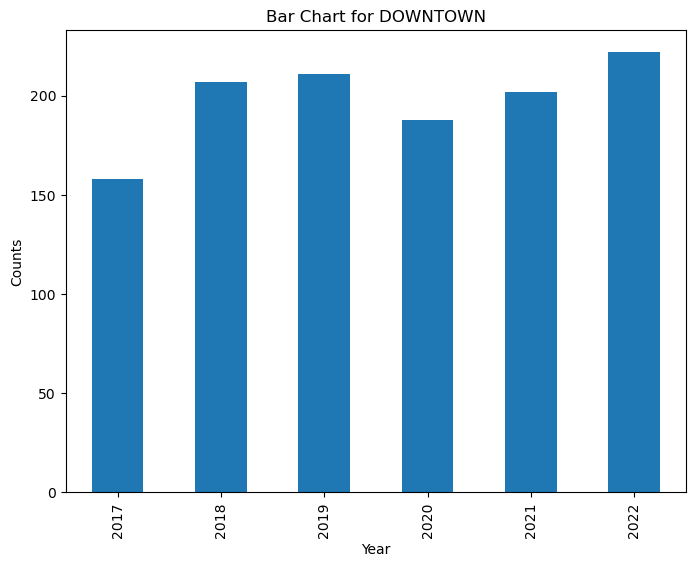

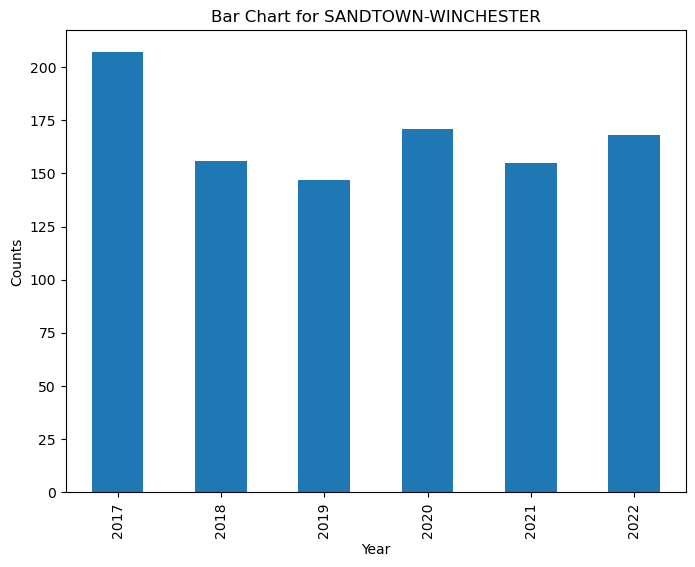

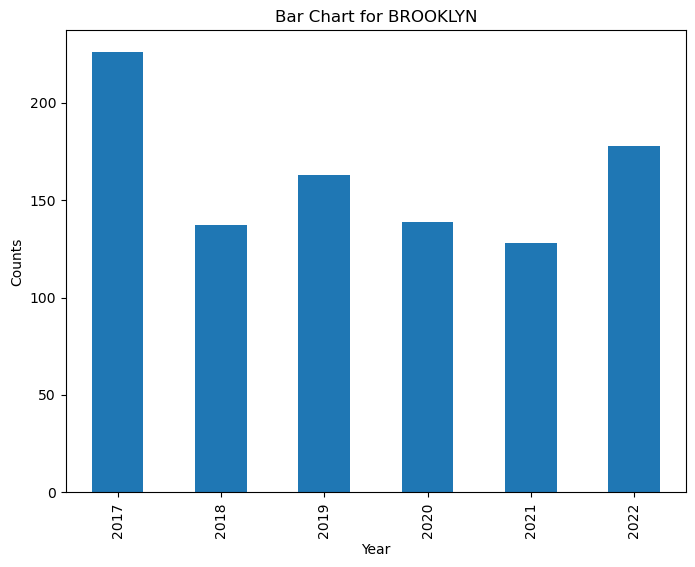

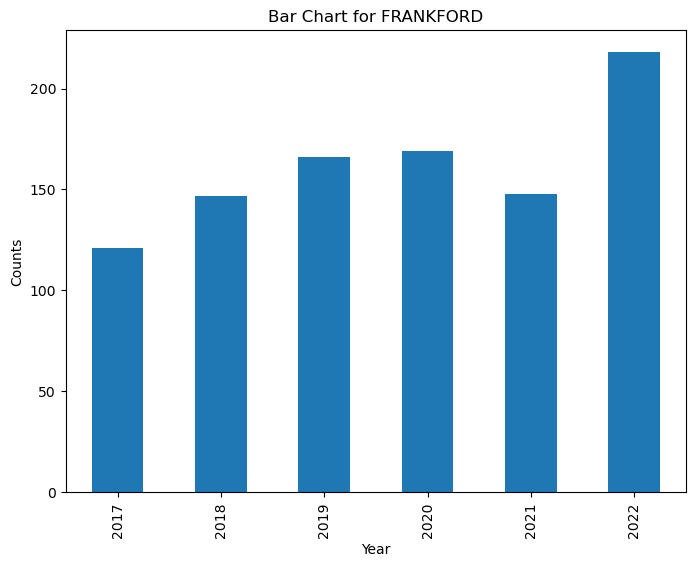

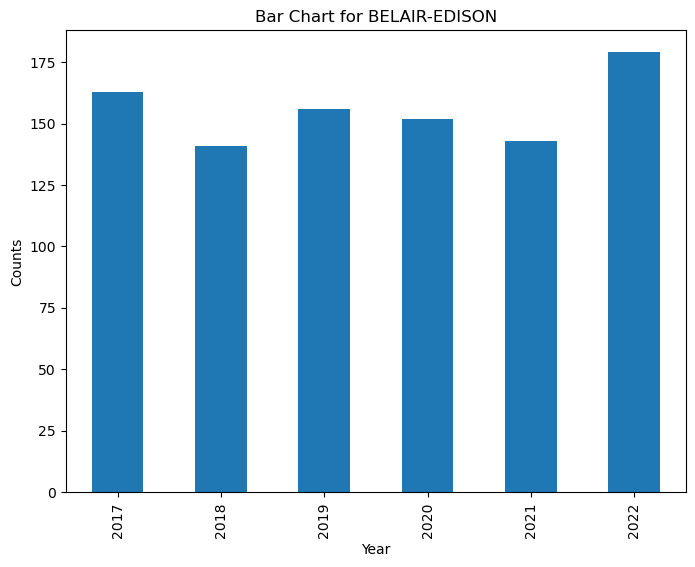

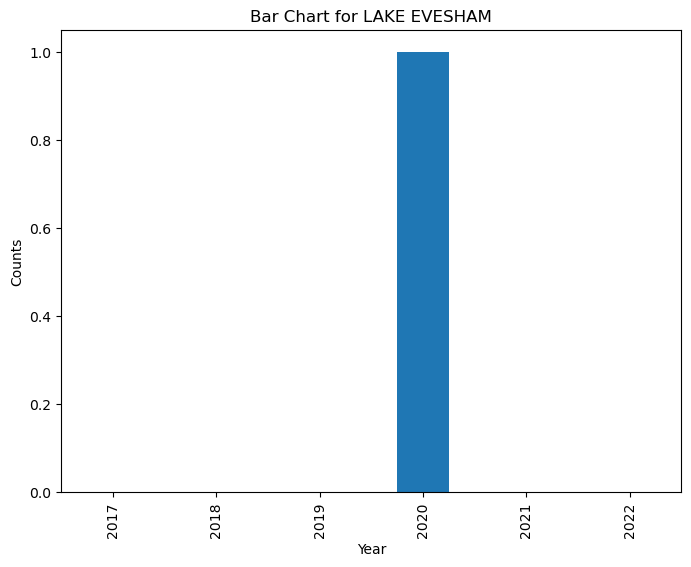

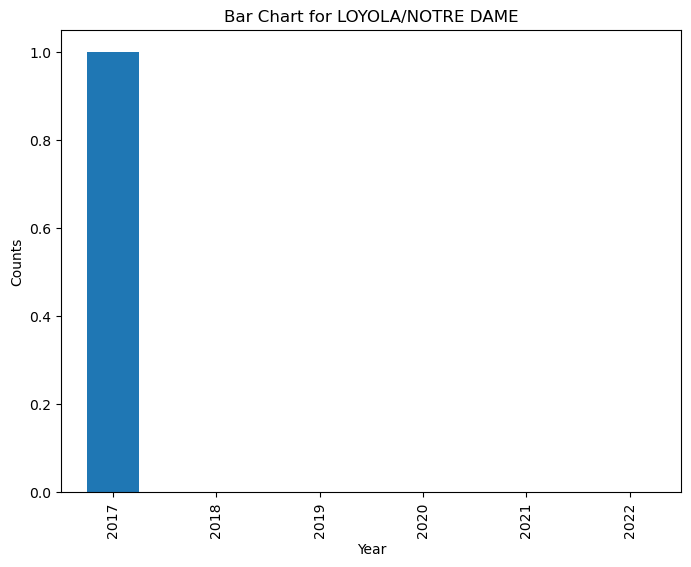

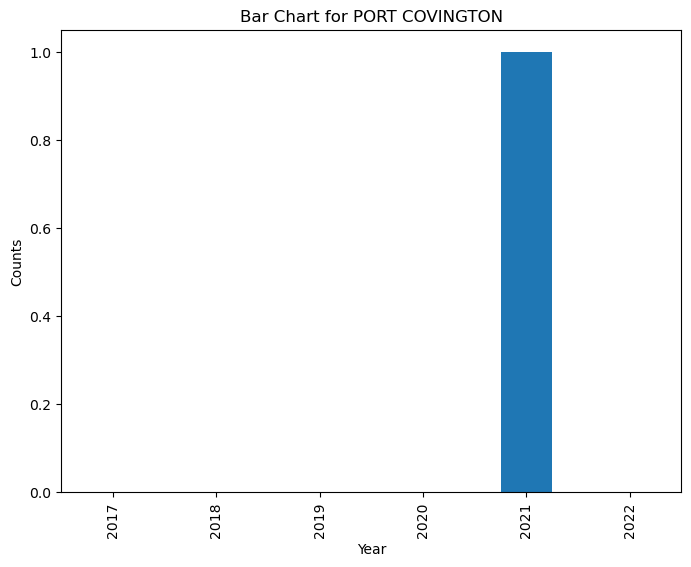

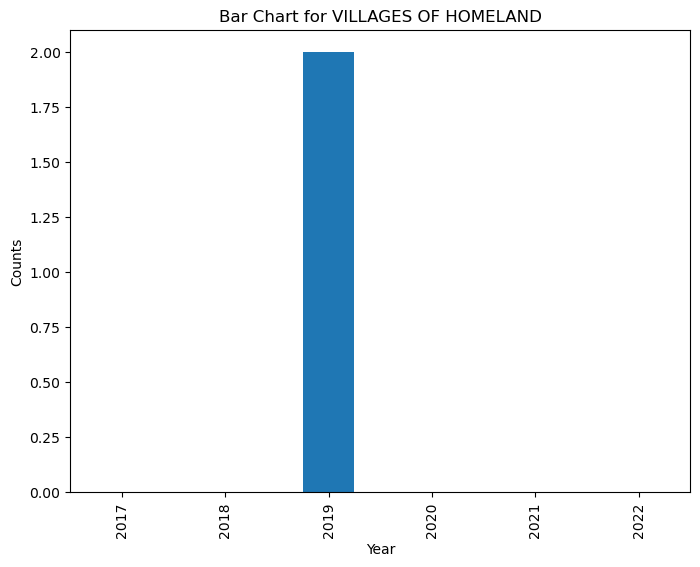

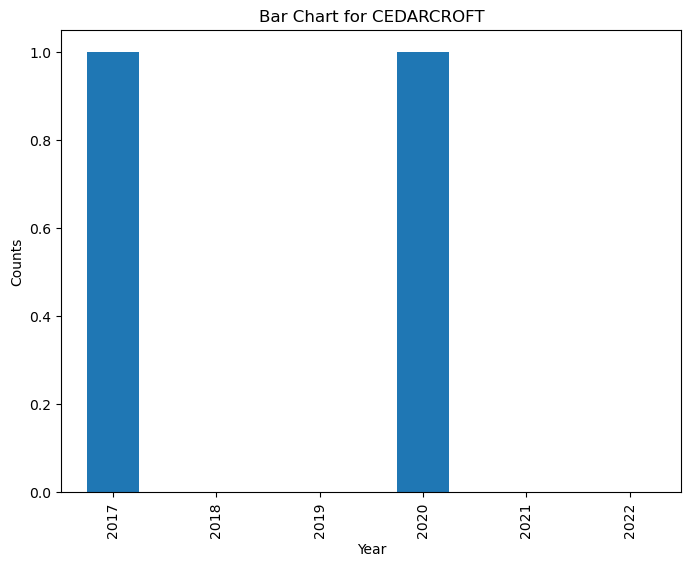

Bar charts saved successfully.


In [37]:

required_neighborhoods_final.set_index('Neighborhood', inplace=True)
# Saving the bar charts for each neighborhood
for neighborhood in required_neighborhoods_final.index:
    plt.figure()  # Create a new figure for each neighborhood
    required_neighborhoods_final.loc[neighborhood].plot(kind='bar', figsize=(8, 6))
    plt.title(f'Bar Chart for {neighborhood}')
    plt.xlabel('Year')
    plt.ylabel('Counts')
    
    # Replace spaces with underscores in the filename
    #filename = re.sub(r'\W+', '', neighborhood) # 're' is python module used for pattern matching and manipulation of strings.
    #plt.savefig(os.path.join('./Result_Pics', f'bar_chart_{filename}.png')) #'os' is a Python module that provides a way to interact with the operating system. 
    plt.show()
    plt.close()

print("Bar charts saved successfully.")
